# Keras Model Conversion

In [1]:
%matplotlib inline

### Start a CAS session

In [2]:
import swat

sess = swat.CAS(cashost, casport)

### Define a MNIST classification model in Keras

In [3]:
from keras import Sequential
from keras.layers import *

Using TensorFlow backend.


In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',padding='same',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same', strides=(2, 2)))
model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

**Note:** DLPy now only support for padding='same'.

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3137000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total para

### Convert Keras model to DLPy model

In [6]:
from dlpy import Model

In [7]:
model1 = Model.from_keras_model(conn=sess, keras_model=model, output_model_table='converted_keras_model')

NOTE: Added action set 'deeplearn'.
NOTE: Model table is attached successfully!
NOTE: Model is named to "converted_keras_model" according to the model name in the table.


### Now model1 is a DLPy model, fully supporting all the function in DLPy.

In [8]:
model1.print_summary()

*==================*===============*========*============*=================*======================*
|   Layer (Type)   |  Kernel Size  | Stride | Activation |   Output Size   | Number of Parameters |
*------------------*---------------*--------*------------*-----------------*----------------------*
| conv2d_1_input...|     None      |  None  |    None    |   (28, 28, 1)   |        0 / 0         |
| conv2d_1(Convo.) |    (5, 5)     |   1    | Rectifier  |  (28, 28, 32)   |       800 / 32       |
| max_pooling2d_...|    (2, 2)     |   2    |    Max     |  (14, 14, 32)   |        0 / 0         |
| conv2d_2(Convo.) |    (5, 5)     |   1    | Rectifier  |  (14, 14, 64)   |      51200 / 64      |
| max_pooling2d_...|    (2, 2)     |   2    |    Max     |   (7, 7, 64)    |        0 / 0         |
| dense_1(F.C.)    | (3136, 1000)  |  None  | Rectifier  |      1000       |    3136000 / 1000    |
| dense_2(Output)  |  (1000, 10)   |  None  |  Softmax   |       10        |      10000 / 10      |


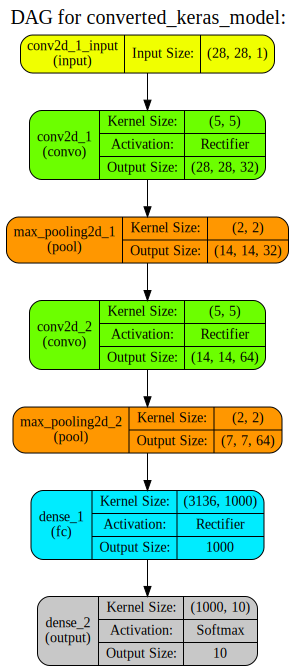

In [9]:
model1.plot_network()

In [10]:
sess.terminate()